### Álgebra Linear Computacional
#### Principal Component Analysis
#### Prof. Alexandre Salles da Cunha e Profa. Ana Paula Couto

O material deste notebook foi extraído do Capítulo 5 do livro "Python Data Science Handobook" de Jake VanderPlas.

Vamos importar um conjunto de 1797 imagens, cada uma representando um dígito (número inteiro) de 0 a 9 escrito à mão. Cada imagem é representada por uma matrix 8 por 8 de inteiros, totalizando 64 posições. A cada posição corresponde uma tonalidade de cinza (intensidade do pixel na imagem).

(1797, 64)


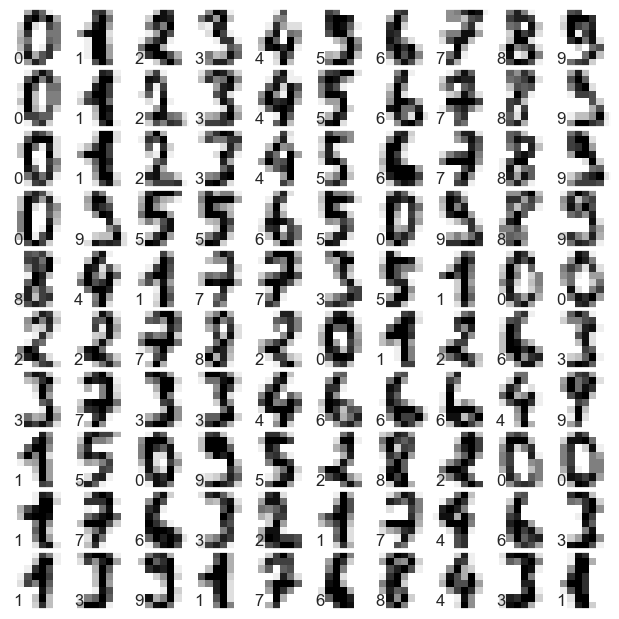

In [3]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
digits = load_digits()
print(digits.data.shape)

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary, interpolation = 'nearest')
    ax.text(0,7,str(digits.target[i]))






Vamos identificar os dois componentes principais da matriz de dimensões 1797 linhas por 64 colunas. Cada linha representa um exemplar (um dígito de 0 a 9 escrito a mão) e cada coluna o valor que este exemplar assume para a posição correspondente na imagem. 

Cada um destes exemplares recebe uma etiqueta, denominada "target", que armazena o dígito correspondente à imagem. Trata-se da informação do especialista sobre a imagem.

Na célula seguinte, fazemos o PCA destes dados, e para cada um das 1797 imagens, projetamos o vetor correspondente à imagem no plano "componente principal 1" no eixo x versus "componente principal 2" no eixo y. Ou seja, a cada imagem plotada correspondem dois valores, referentes à projeção do indivíduo (um vetor de 64 entradas) em um espaço vetorial (espaço coluna) dos dois vetores singulares principais. 

In [4]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(projected.shape)

(1797, 2)


A imagem a seguir também identifica o dígito (targer) correspondente a cada uma das figuras, na escala representada à esquerda. Observe que as figuras correspondentes aos mesmos dígitos são agrupadas, isto é, localizam-se razoavelmente próximas umas das outras.

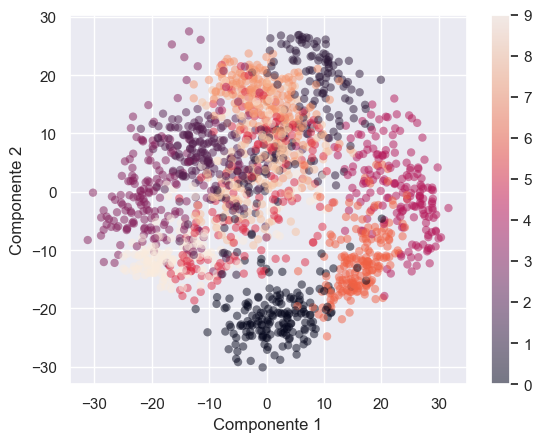

In [5]:
plt.scatter(projected[:,0],projected[:,1],\
            c=digits.target, edgecolor = 'none', alpha = 0.5)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar()
            

Na próxima parte do estudo, fazemos uma avaliação acumulativa da variância explicada por cada um dos vetores singulares. Acumulamos os valores dos $\sigma_i$ correspondente aos valores singulares da matriz de 1797 x 64 entradas.

Text(0, 0.5, 'Variância percentual acumulada')

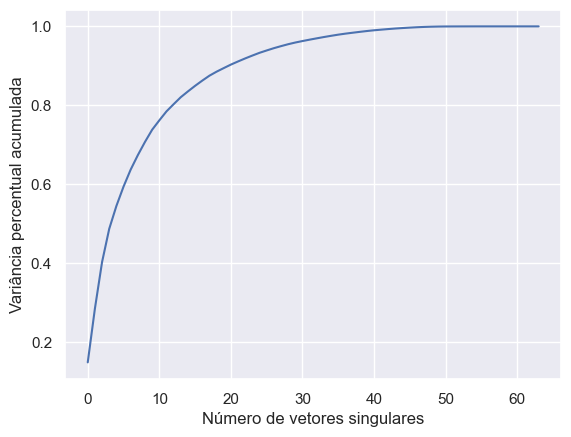

In [6]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de vetores singulares')
plt.ylabel('Variância percentual acumulada')

A função abaixo apenas plota um conjunto de dados. Vamos usar esta função para plotar as figuras originais e perturbações destas figuras.

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap = 'binary',\
                 interpolation = 'nearest',clim=(0,16))

Vamos criar um conjunto de 1797 figuras à partir de perturbações das 1797 figuras originais. Vamos introduzir ruído nestas matrizes. Este procedimento ilustra o efeito de ruído que altera o rank das matrizes de dados com as quais,  na prática, temos que trabalhar.

(1797, 64)


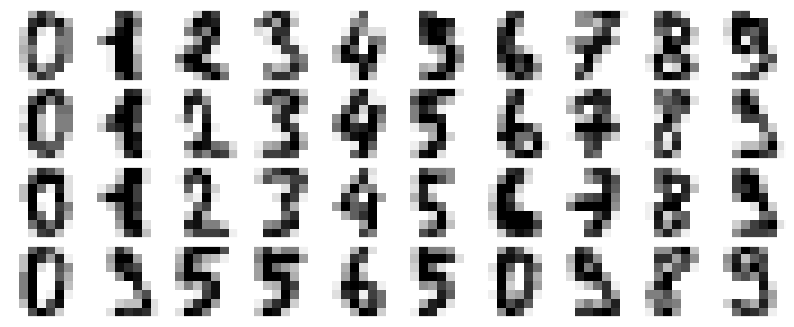

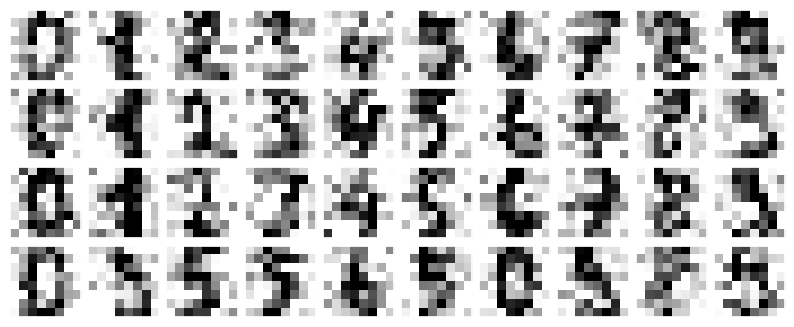

In [8]:
np.random.seed(40)
noisy = np.random.normal(digits.data,4) # o 10 controla o tamanho da perturbação
plot_digits(digits.data)
plot_digits(noisy)
print(noisy.shape)

Na próxima parte do estudo, vamos fazer o PCA do conjunto de dados com ruído, retendo o número de componentes principais suficiente para explicar 50% da variância total dos dados. O resultado mostra que com 12 valores singulares, conseguimos explicar pelo menos 50% da variância dos dados.

In [34]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

Nesta parte do estudo, vamos plotar as imagens reconstruídas com apenas estes 12 valores singulares. Veja o quanto as imagens filtradas são semelhantes às imagens sem ruído. 

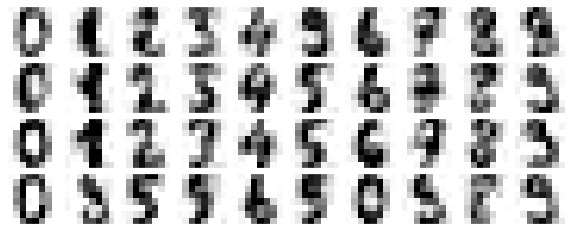

In [35]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Segundo exemplo: Reconhecimento facial

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


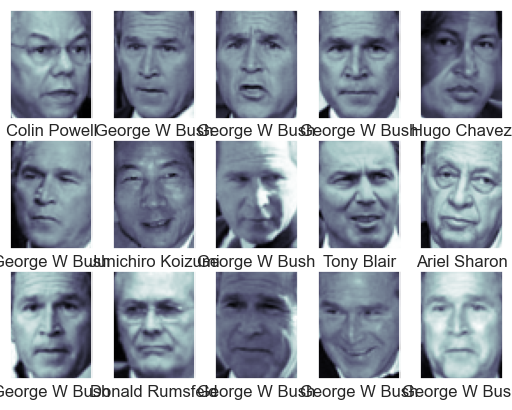

In [9]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)
fig,ax = plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap = 'bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [16]:
#from sklearn.decomposition import PCA as RandomizedPCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

A seguir, vamos imprimir cada um dos 24 primeiros valores singulares. 

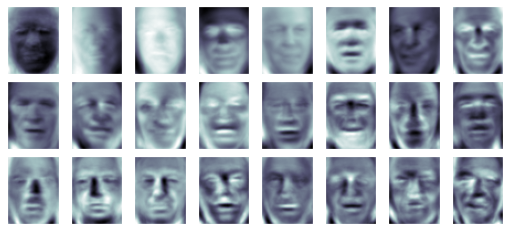

In [17]:
fig, axes = plt.subplots(3,8, figsize = (9,4), subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw = dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap = 'bone')

Text(0, 0.5, 'Variância total acumulada')

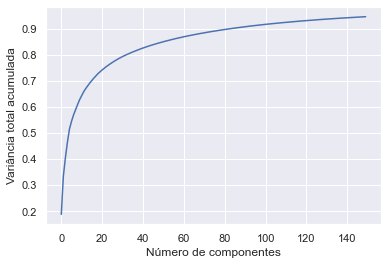

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Variância total acumulada")

A figura acima indica que os 150 primeiros valores singulares (e vetores singulares) permitem explicar mais de 90% da variância dos dados. Devemos então ser capazes de "reconstruir" bem as imagens com apenas estas 150 peças fundamentais de informações. 

Vamos novamente fazer o PCA tomando os 150 primeiros vetores singulares, calcular cada figura a partir destes 150 vetores. No código abaixo, components fornece os vetores 150 principais e projected escreve os dados a partir destes vetores.

In [19]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Imprimindo os resultados, as figuras correspondentes à aproximação. A primeira linha de imagens corresponde à original, a segunda corresponde à aproximada com 150 vetores singulares.

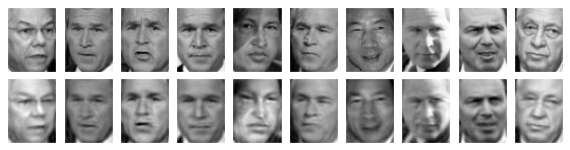

In [20]:
fig, ax = plt.subplots(2,10,figsize = (10,2.5),subplot_kw = {'xticks':[],'yticks':[]},\
                       gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap = 'binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap = 'binary_r')